# <span style='color:black'>Capstone Project Phase 4 (Unsupervised ML)

# <span style='color:orange'>4.1  "Create 3 clusters as below.
1. Sensitive Area's

2. Moderate Area's

3. Peaceful Area's"

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("42_District_wise_crimes_committed_against_women_2001_2012.csv")

In [3]:
df

,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0
1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0
2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0
3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0
...,...,...,...,...,...,...,...,...,...,...
9012,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,1,0,1,0
9013,LAKSHADWEEP,TOTAL,2012,0,0,0,1,0,1,0
9014,PUDUCHERRY,KARAIKAL,2012,6,2,0,2,0,1,0
9015,PUDUCHERRY,PUDUCHERRY,2012,7,14,0,7,2,5,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9017 entries, 0 to 9016
Data columns (total 10 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   STATE/UT                                             9017 non-null   object
 1   DISTRICT                                             9017 non-null   object
 2   Year                                                 9017 non-null   int64 
 3   Rape                                                 9017 non-null   int64 
 4   Kidnapping and Abduction                             9017 non-null   int64 
 5   Dowry Deaths                                         9017 non-null   int64 
 6   Assault on women with intent to outrage her modesty  9017 non-null   int64 
 7   Insult to modesty of Women                           9017 non-null   int64 
 8   Cruelty by Husband or his Relatives                  9017 non-null   int64 
 9

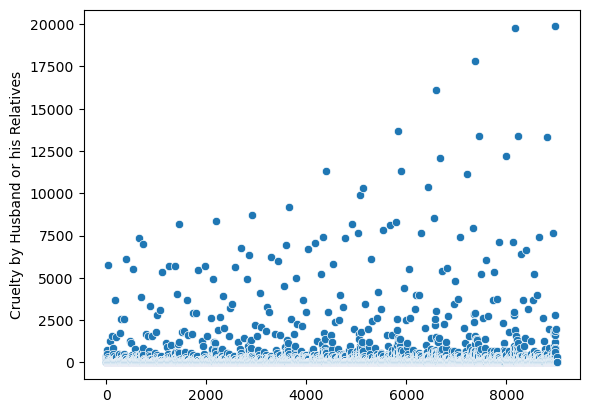

In [5]:
import seaborn as sns
sns.scatterplot(df['Cruelty by Husband or his Relatives'])
plt.show()

In [6]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

In [7]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

In [8]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

km = KMeans(n_clusters=3, n_init=10)
y = km.fit_transform(df[['STATE/UT','Rape']])

In [9]:
df['Cruelty by Husband or his Relatives']=y

In [10]:
km.cluster_centers_

array([[  18.44673384,   29.71832899],
       [  23.1       , 2192.95      ],
       [  15.95833333,  889.26388889]])

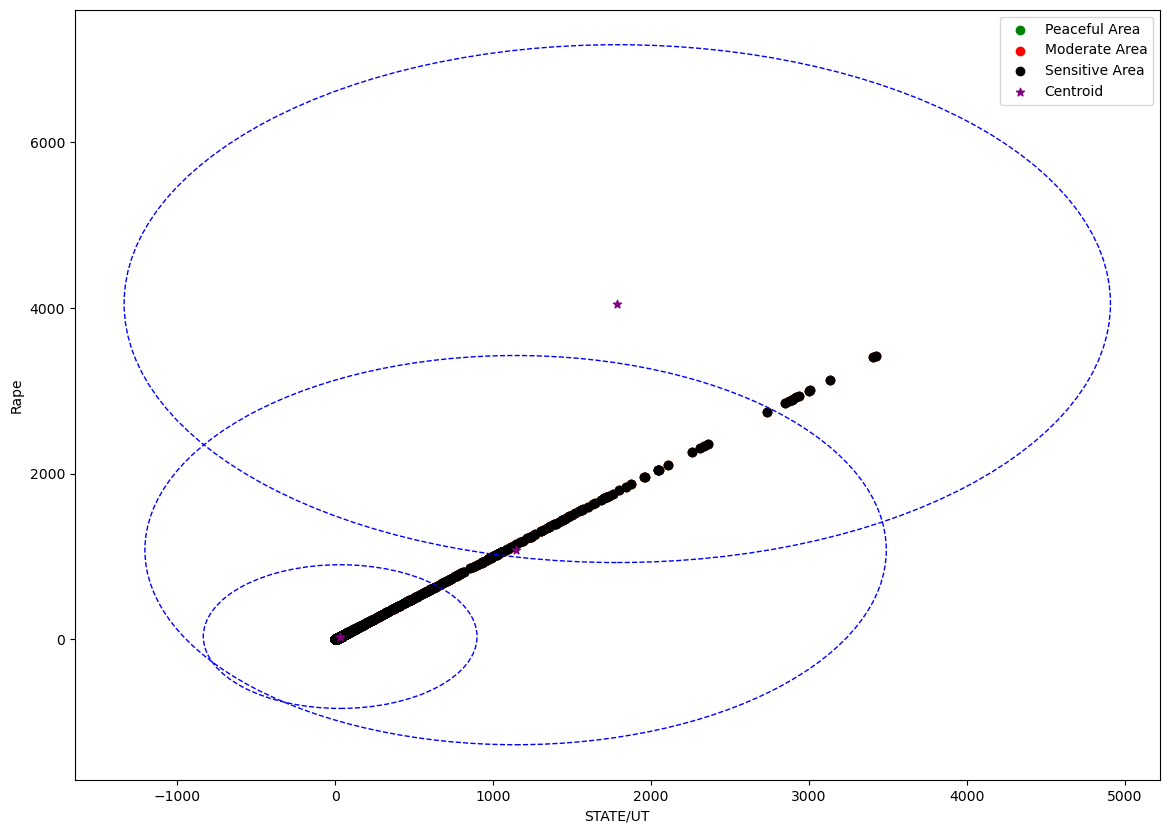

In [25]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

plt.figure(figsize=(14,10))
plt.scatter(df['Rape'], df['Rape'], color='green', label='Peaceful Area')
plt.scatter(df['Rape'], df['Rape'], color='red', label='Moderate Area')
plt.scatter(df['Rape'], df['Rape'], color='black', label='Sensitive Area')

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='purple', marker='*', label='Centroid')

for i in range(3):
    center_x = km.cluster_centers_[i, 0]
    center_y = km.cluster_centers_[i, 1]
    radius = max(df[df['cluster'] == i]['Rape'].max() - center_x, center_x - df[df['cluster'] == i]['Rape'].min(),
                 df[df['cluster'] == i]['Rape'].max() - center_y, center_y - df[df['cluster'] == i]['Rape'].min())
    # Plot circle
    circle = plt.Circle((center_x, center_y), radius, color='blue', fill=False, linestyle='--')
    plt.gca().add_patch(circle)

plt.xlabel('STATE/UT')
plt.ylabel('Rape')
plt.legend()
plt.show()


C:\Users\mdirf\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


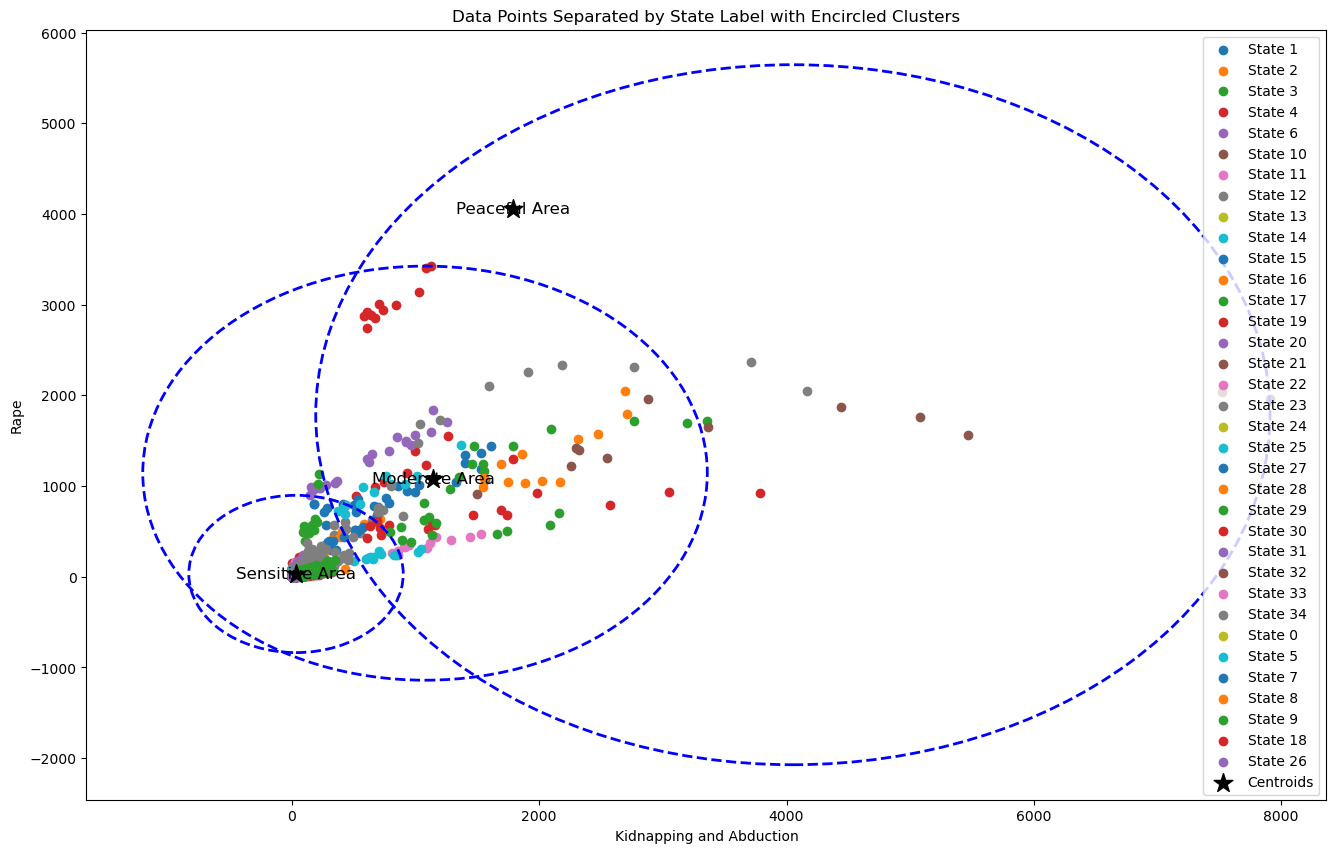

In [16]:
km = KMeans(n_clusters=3)

km.fit(df[['Rape', 'Kidnapping and Abduction']])

df['cluster'] = km.labels_

label_encoder = LabelEncoder()
df['STATE/UT_encoded'] = label_encoder.fit_transform(df['STATE/UT'])

plt.figure(figsize=(16, 10))
for state_label in df['STATE/UT_encoded'].unique():
    df_state = df[df['STATE/UT_encoded'] == state_label]
    plt.scatter(df_state['Kidnapping and Abduction'], df_state['Rape'], label=f'State {state_label}')

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='black', marker='*', s=200, label='Centroids')

cluster_sizes = [sum(df['cluster'] == i) for i in range(3)]

for i, (center_x, center_y) in enumerate(km.cluster_centers_):
    if cluster_sizes[i] < 100:
        centroid_name = 'Peaceful Area'
    elif cluster_sizes[i] < 500:
        centroid_name = 'Moderate Area'
    else:
        centroid_name = 'Sensitive Area'
        
    plt.text(center_x, center_y, centroid_name, fontsize=12, ha='center', va='center')

for i in range(3):
    df_cluster = df[df['cluster'] == i]
    center_x = df_cluster['Kidnapping and Abduction'].mean()
    center_y = df_cluster['Rape'].mean()

    radius = max(df_cluster['Kidnapping and Abduction'].max() - center_x, center_x - df_cluster['Kidnapping and Abduction'].min(),
                 df_cluster['Rape'].max() - center_y, center_y - df_cluster['Rape'].min())

    circle = plt.Circle((center_x, center_y), radius, color='blue', fill=False, linestyle='--', linewidth=2)
    plt.gca().add_patch(circle)

# Set labels and title
plt.xlabel('Kidnapping and Abduction')
plt.ylabel('Rape')
plt.title('Data Points Separated by State Label with Encircled Clusters')
plt.legend()
plt.show()


# <span style='color:red'>4.2  Create DataFrame for each cluster that shows data according to the areas.

In [17]:
df_peaceful_area = df[df['cluster'] == 0]
df_sensitive_area = df[df['cluster'] == 2]
df_moderate_area = df[df['cluster'] == 1]

## <span style='color:orange'>"Peaceful Area Data"

In [18]:
df_peaceful_area.head(60)

,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls,cluster,STATE/UT_encoded
0,1,3,2001,50,30,16,149,34,26.753219,0,0,1
1,1,28,2001,23,30,7,118,24,18.695573,0,0,1
2,1,154,2001,27,34,14,112,83,17.657232,0,0,1
3,1,172,2001,20,20,17,126,38,19.970840,0,0,1
4,1,220,2001,23,26,12,109,58,18.695573,0,0,1
5,1,277,2001,0,0,0,1,0,34.461103,0,0,1
6,1,278,2001,54,51,7,139,129,29.899633,0,0,1
7,1,305,2001,37,39,24,118,27,18.905323,0,0,1
8,1,387,2001,56,49,62,414,81,31.545439,0,0,1
9,1,400,2001,47,30,17,180,336,24.556968,0,0,1


<Figure size 800x1200 with 0 Axes>

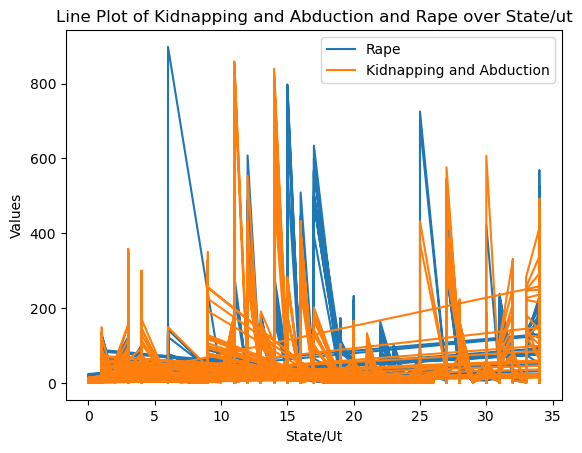

In [19]:
plt.figure(figsize=(8,12))
df_peaceful_area.plot(x='STATE/UT', y=['Rape', 'Kidnapping and Abduction'], kind='line')
plt.xlabel('State/Ut')
plt.ylabel('Values')
plt.title('Line Plot of Kidnapping and Abduction and Rape over State/ut')
plt.show()

## <span style='color:orange'>"Moderate Area Data"

In [20]:
df_moderate_area.head(60)

,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls,cluster,STATE/UT_encoded
28,1,753,2001,871,765,420,3544,2271,841.462559,7,1,1
70,3,753,2001,817,1070,59,850,4,787.433192,0,1,3
115,4,753,2001,888,518,859,562,21,858.403247,83,1,4
135,6,753,2001,959,171,70,1763,161,929.365023,0,1,6
351,19,753,2001,2851,668,609,7063,751,2821.281725,0,1,19
397,20,753,2001,1302,611,308,2823,1120,1272.282619,1,1,20
470,25,753,2001,790,434,294,1655,458,760.309913,0,1,25
529,28,753,2001,1049,2165,376,2878,56,1019.326439,1,1,28
688,34,753,2001,709,695,265,954,48,679.459706,3,1,34
700,9,191,2001,381,964,113,502,90,351.408670,0,1,9


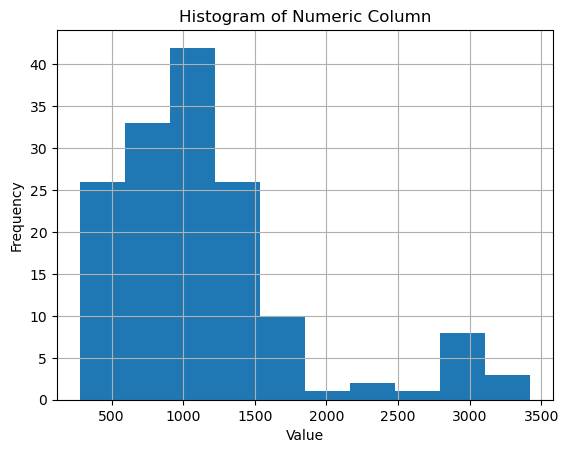

In [21]:
df_moderate_area['Rape'].hist()
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Numeric Column')
plt.show()

### <span style='color:orange'>"Sensitive Area Data"

In [22]:
df_sensitive_area.head(60)

,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls,cluster,STATE/UT_encoded
650,32,753,2001,1958,2879,2211,2870,2575,1928.329301,0,2,32
5040,32,753,2007,1648,3363,2076,2522,2882,1618.338425,0,2,32
5796,32,753,2008,1871,4439,2237,2955,3374,1841.331552,0,2,32
6563,32,753,2009,1759,5078,2232,2782,2524,1729.334782,0,2,32
6718,3,753,2010,1721,2767,175,1400,20,1691.352208,0,2,3
7342,32,753,2010,1563,5468,2217,2793,11,1533.341571,0,2,32
7381,34,753,2010,2311,2764,507,2465,163,2281.334690,8,2,34
7497,3,753,2011,1700,3192,121,1193,8,1670.353095,2,2,3
7542,4,753,2011,934,3050,1413,790,11,904.397064,10,2,4
8004,28,753,2011,1800,2713,514,2447,9,1770.307448,0,2,28


<Figure size 800x1200 with 0 Axes>

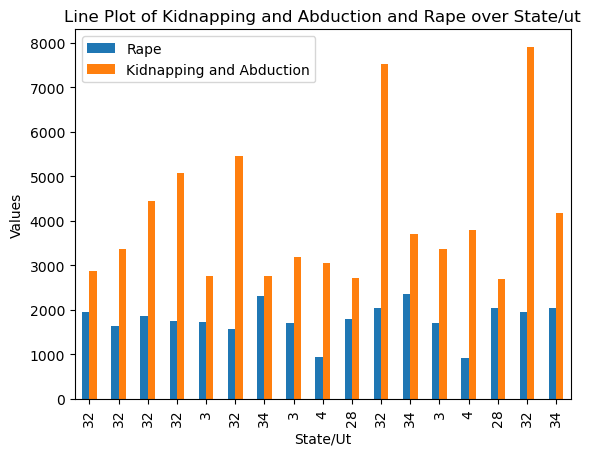

In [23]:
plt.figure(figsize=(8,12))
df_sensitive_area.plot(x='STATE/UT', y=['Rape', 'Kidnapping and Abduction'], kind='bar')
plt.xlabel('State/Ut')
plt.ylabel('Values')
plt.title('Line Plot of Kidnapping and Abduction and Rape over State/ut')
plt.show()

# <span style='color:red'> 4.3  "Analyse your clusters and prepare a report that explains all your observations.

Based on the dataset, the analysis reveals the following observations:

### Peaceful Area:

The number of rape cases, dowry deaths, and kidnapping and abduction incidents is relatively low in Andra pardesh, Assam and Arunachal Pradesh andcompared to moderate and sensitive areas.Peaceful areas exhibit a relatively lower crime rate against women compared to other areas.

### Moderate Area:

Moderate areas have a moderate level of crime against women, with the number of incidents falling between peaceful and sensitive areas.


### Sensitive Area:

Sensitive areas, particularly in Bihar, Chhattisgarh, West Bengal, and Andhra Pradesh, show a significantly higher rate of crime against women.
These states have a higher number of reported cases of rape, dowry deaths, and kidnapping and abduction incidents, indicating a concerning trend in terms of women's safety.
Overall, the analysis highlights the varying levels of crime against women across different regions. While peaceful areas exhibit a relatively lower crime rate, sensitive areas, particularly in certain states, pose significant challenges in terms of ensuring women's safety and security.

# <span style='color:red'>4.4  Capstone project overall story in your own words. Min 1000 words.

**Understanding Crime Against Women in India: An In-depth Analysis**

Crime against women is a pressing issue worldwide, and India is no exception. With a rich cultural tapestry and diverse demographics, India grapples with various social, economic, and cultural factors that contribute to the perpetuation of crimes against women. In this comprehensive analysis, we delve into the complexities of crime against women in India, exploring trends, patterns, and underlying factors that shape the landscape of women's safety and security in the country.

**The State of Women's Safety:**

India is a vast and diverse country, comprising numerous states and union territories, each with its unique socio-economic and cultural dynamics. However, despite its diversity, one common thread binds the nation – the pervasive issue of crime against women. From rural villages to bustling urban centers, women across India face myriad challenges, ranging from domestic violence and sexual harassment to dowry-related crimes and human trafficking.

**Analyzing the Data:**

To gain insights into the prevalence and patterns of crime against women in India, we turn to available datasets and statistical analyses. By examining crime data collected over several years, we can identify trends and patterns, shedding light on the areas of concern and areas of progress.

**The Three Zones: Peaceful, Moderate, and Sensitive:**

Our analysis categorizes regions in India into three distinct zones based on the prevalence of crime against women: peaceful, moderate, and sensitive areas.

**Peaceful Areas:**

Peaceful areas are characterized by relatively low levels of crime against women. These regions often boast higher levels of education, economic prosperity, and social cohesion, contributing to a safer environment for women. However, it's essential to note that even in peaceful areas, pockets of violence and discrimination against women may persist, necessitating continued efforts to address underlying issues.

**Moderate Areas:**

Moderate areas exhibit an intermediate level of crime against women. These regions may experience sporadic incidents of violence and harassment against women, but overall, the prevalence of such crimes remains moderate. Factors contributing to the moderate levels of crime in these areas may include socio-economic disparities, inadequate law enforcement, and cultural attitudes towards women.

**Sensitive Areas:**

Sensitive areas represent regions with a high prevalence of crime against women, often characterized by systemic issues such as poverty, gender inequality, and lack of access to education and healthcare. In these areas, women face significant risks to their safety and security, with incidents of rape, dowry deaths, and kidnapping and abduction being alarmingly common. States such as Bihar, Chhattisgarh, West Bengal, and Andhra Pradesh emerge as hotspots for crime against women, highlighting the urgent need for targeted interventions and policy measures to address underlying issues and improve women's safety.

**Challenges and Opportunities:**

Addressing the issue of crime against women requires a multi-pronged approach that encompasses legislative reforms, law enforcement initiatives, social awareness campaigns, and community empowerment programs. While challenges abound, there are also opportunities for positive change, with grassroots movements, advocacy groups, and government initiatives working towards creating safer and more inclusive communities for women.

**Conclusion:**

In conclusion, crime against women in India is a complex and multifaceted issue that demands urgent attention and concerted efforts from all stakeholders. By understanding the nuances of crime patterns, identifying key risk factors, and implementing evidence-based interventions, we can work towards creating a safer and more equitable society for women across India. It's time to stand together, raise our voices, and take decisive action to end violence and discrimination against women, ensuring that every woman can live a life free from fear and oppression.

# <span style='color:green'>=====================THANK YOU======================